In [18]:
# import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
def calculate_RSI(data, window):
    delta = data.diff()
    up_days = delta.copy()
    up_days[delta <= 0] = 0.0
    down_days = abs(delta.copy())
    down_days[delta > 0] = 0.0
    RS_up = up_days.rolling(window).mean()
    RS_down = down_days.rolling(window).mean()
    rsi = 100 - 100 / (1 + RS_up / RS_down)
    return rsi

In [20]:
# make the function more flexible
def plot_stock_price(ticker_symbol, start_date, end_date, moving_average_window, rsi_window):
    # Get the stock data
    ticker_data = yf.Ticker(ticker_symbol)
    
    # Get the historical prices for this ticker
    ticker_df = ticker_data.history(period='1d', start=start_date, end=end_date)
    
    # Calculate the moving average
    ticker_df['MA'] = ticker_df['Close'].rolling(window=moving_average_window).mean()

    # Calculate the RSI
    ticker_df['RSI'] = calculate_RSI(ticker_df['Close'], rsi_window)

    # Create a figure with two subplots (one for the stock price, one for the RSI)
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})

    # Plot the Close price and the moving average on the first subplot
    ax1.set_title(f'{ticker_symbol} Stock Price and RSI from {start_date} to {end_date}', fontsize=15)
    ax1.plot(ticker_df['Close'], label='Close Price', color='blue')
    ax1.plot(ticker_df['MA'], label=f'Moving Average ({moving_average_window} days)', color='red')
    ax1.legend(loc='upper left')
    ax1.grid()

    # Plot the RSI on the second subplot
    ax2.plot(ticker_df['RSI'], label=f'RSI ({rsi_window} days)', color='orange')
    ax2.axhline(0, linestyle='--', alpha=0.1)
    ax2.axhline(20, linestyle='--', alpha=0.5)
    ax2.axhline(30, linestyle='--')
    ax2.axhline(70, linestyle='--')
    ax2.axhline(80, linestyle='--', alpha=0.5)
    ax2.axhline(100, linestyle='--', alpha=0.1)
    ax2.legend(loc='upper left')
    ax2.grid()

    # Set labels
    ax2.set_xlabel('Date')
    ax1.set_ylabel('Stock Price')
    ax2.set_ylabel('RSI')

    # Show the plot
    plt.show()

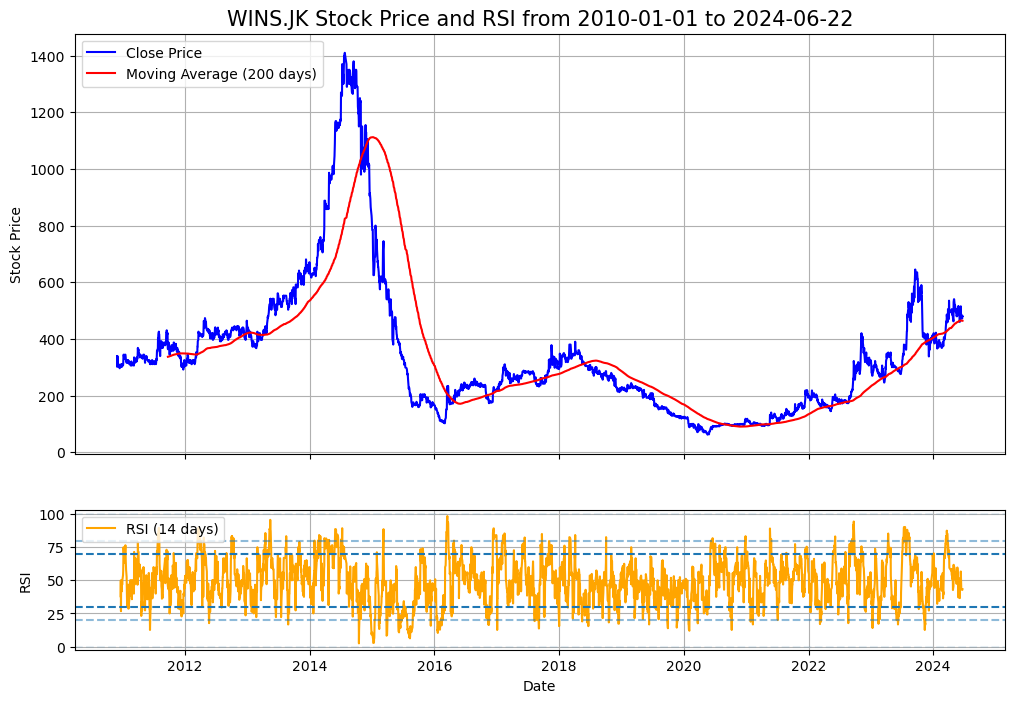

In [21]:
# Test the function
plot_stock_price("WINS.JK", "2010-01-01", "2024-06-22", 200, 14) # Tunnable MA 200 and RSI 14